<a href="https://colab.research.google.com/github/YRYoung/HPC/blob/main/Assigenment/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

* Write a Python function that takes *N* as an input and returns the matrix *A* and vector *f*.
* You should use an appropriate sparse storage format for the matrix *A*.

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix


def generate_mat(N):
    assert N >= 0
    if N == 0: return np.array([1]), np.array([1])

    f = np.concatenate([np.zeros(N), [1]], axis=0)

    A = np.zeros([N + 1, N + 1])
    for i in range(1, N):
        A[i, i - 1:i + 2] = [-1, 2. - (29 * 29 * np.pi * np.pi / 4 / N / N), -1]
    A[0, 0] = 1
    A[N, N] = 1

    f = csr_matrix(f)
    A = csr_matrix(A)
    # A = csc_matrix(A)

    return A, f


A, f = generate_mat(8)
print(A, '\n\n', f)

  (0, 0)	1.0
  (1, 0)	-1.0
  (1, 1)	-30.423192583266214
  (1, 2)	-1.0
  (2, 1)	-1.0
  (2, 2)	-30.423192583266214
  (2, 3)	-1.0
  (3, 2)	-1.0
  (3, 3)	-30.423192583266214
  (3, 4)	-1.0
  (4, 3)	-1.0
  (4, 4)	-30.423192583266214
  (4, 5)	-1.0
  (5, 4)	-1.0
  (5, 5)	-30.423192583266214
  (5, 6)	-1.0
  (6, 5)	-1.0
  (6, 6)	-30.423192583266214
  (6, 7)	-1.0
  (7, 6)	-1.0
  (7, 7)	-30.423192583266214
  (7, 8)	-1.0
  (8, 8)	1.0 

   (0, 8)	1.0


* compute the approximate solution for your problem for *N=10*, *N=100*, and *N=10*.
* Plot the solutions for these three values of *N*.



[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


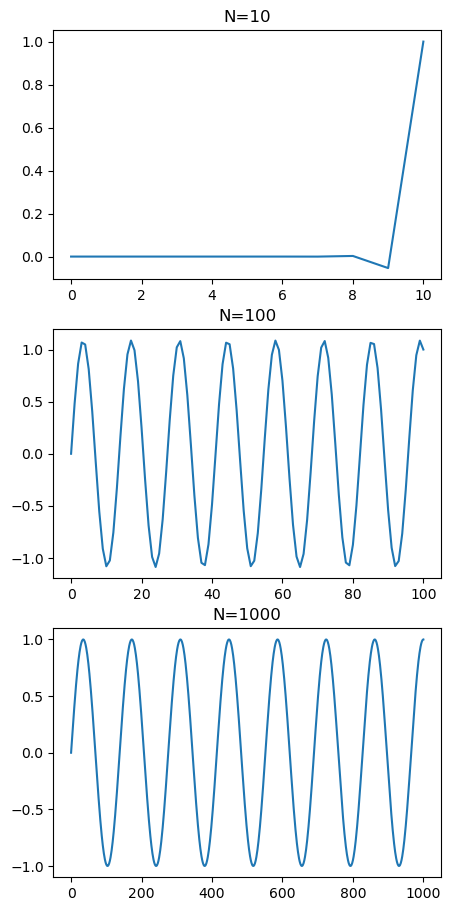

In [ ]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

i = 0
fig, ax = plt.subplots(3, 1, figsize=(5, 11))
print(ax)

for N in [10, 100, 1000]:
    A, f = generate_mat(N)
    u = spsolve(A, f.T)

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x, u)
    ax[i].set_title('N=' + str(N))
    i = i + 1

plt.show()

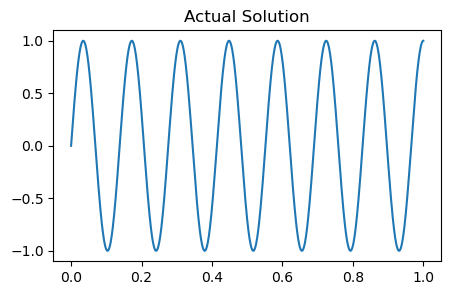

In [ ]:
k = 29. * np.pi / 2.
x = np.linspace(0, 1, 1000)

u = np.sin(k * x)
plt.figure(figsize=(5, 3))
plt.plot(x, u)
plt.title('Actual Solution')
plt.show()

* Briefly (1-2 sentences) comment on your plots:

  + __How different__ are they to each other? 

  + Which do you expect to be **closest** to the actual solution of the wave problem?





Closest: N=1000

* Compute this error for a range of values for  of your choice, on axes that use log scales
* plot *N* against the error in your solution.

100%|██████████| 40/40 [00:04<00:00,  9.65it/s]


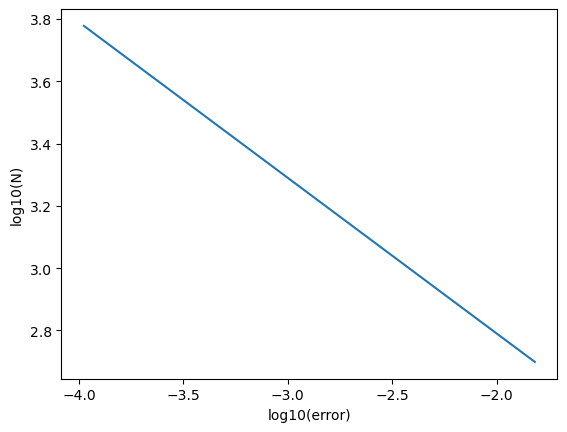

In [ ]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 29. * np.pi / 2.
error = []
sizes = np.round(np.linspace(500, 6000, 40))
for i, N in enumerate(tqdm(sizes)):
    x = np.linspace(0, 1, int(N + 1))
    A, f = generate_mat(int(N))
    u = spsolve(A, f.T)
    u_exact = np.sin(k * x)  #!!
    error.append(np.max(np.abs(u - u_exact)))

plt.plot(np.log10(error), np.log10(sizes))
plt.xlabel('log10(error)')
plt.ylabel('log10(N)')
ax = plt.gca()
plt.show()

# print(sizes, '\n', error)

* For the same values of *N*, measure the time taken to compute your approximations for both functions.
* On axes that both use log scales, plot *N* against the time taken to compute a solution.

100%|██████████| 40/40 [00:44<00:00,  1.10s/it]


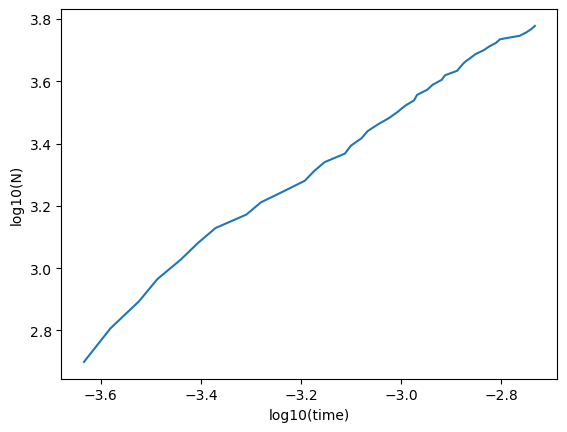

In [ ]:

import matplotlib.pyplot as plt
from tqdm import tqdm
import timeit

k = 29. * np.pi / 2.
times = []
sizes = np.round(np.linspace(500, 6000, 40))
for i, N in enumerate(tqdm(sizes)):
    x = np.linspace(0, 1, int(N + 1))
    A, f = generate_mat(int(N))

    t = timeit.Timer(lambda: spsolve(A, f.T)).timeit(1000)

    times.append(t / 1000)

plt.plot(np.log10(times), np.log10(sizes))

plt.xlabel('log10(time)')
plt.ylabel('log10(N)')
plt.show()

* pick a value of that you would expect to give error of or 10<sup>-8</sup> less.
* Briefly (1-2 sentences) explain how you picked your value of *N*
* predict how long the computation will take

Compute the approximate solution with your value of *N*.
Measure the time taken and the error, and briefly (1-2 sentences) comment on how these compare to your predictions.

In [5]:
from sympy import symbols, solve
import math

log_time = np.log10(times)
log_error = np.log10(error)
log_size = np.log10(sizes)

f1 = np.polyfit(log_error, log_size, 1)
print('Fit function of log_error & log_size:', np.poly1d(f1))

x = symbols('x')
a = solve(f1[0] * x + f1[1] < -8)
print('\nInequation:\n', a)
result_logN = a.args[0].args[0]
result_N = math.ceil(math.pow(10., result_logN))
print('\nExpected minimum value of N that satisfies the given condition:\n', result_N)

f2 = np.polyfit(log_size, log_time, 1)
print('\nFit function of log_size & log_time:', np.poly1d(f2))

x_time = math.pow(10., f2[0] * result_logN + f2[1])
print('\nExpected computation time:\n{:.0f}'.format(x_time))

NameError: ignored

# Part2

* Implement this iterative scheme in Python.
    * You should implement this as a function that takes as an input.

In [3]:
import numpy as np


def generate_tem_mat(N):
    nelements = ((N - 1) ** 2 + N - 1) * 4 + (N + 1) * 3 - 2
    row_ind = np.zeros(nelements, dtype=np.float64)
    col_ind = np.zeros(nelements, dtype=np.float64)
    data = np.zeros(nelements, dtype=np.float64)

    f = np.zeros((N + 1) ** 2, dtype=np.float64)
    n = 0
    for i in range(N + 1):
        for j in range(N + 1):
            location = j * (N + 1) + i

            if i == 0 or i == N or j == 0:
                row_ind[n] = col_ind[n] = location
                data[n] = 1
                f[location] = 10 if i == 0 or i == N else 0
                n += 1
            else:
                row_ind[n:n + 4] = location
                col_ind[n:n + 4] = [location - (N + 2),
                                    location - (N + 1),
                                    location - N,
                                    location]
                data[n:n + 4] = [-N / param,
                                 -1 + N / (param / 2),
                                 -N / param,
                                 1]
                f[location] = 0
                n += 4

    return coo_matrix((data, (row_ind, col_ind)), shape=((N + 1) ** 2, (N + 1) ** 2)).tocsr(), f

Test for a single *N*

In [ ]:
from scipy.sparse.linalg import spsolve

N = 5
A, f = generate_tem_mat(N)
u = spsolve(A, f).reshape((N + 1, N + 1))
print(u)

[[1.00000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+01]
 [1.00000000e+01 5.00000000e-02 0.00000000e+00 0.00000000e+00
  5.00000000e-02 1.00000000e+01]
 [1.00000000e+01 9.95000000e-02 2.50000000e-04 2.50000000e-04
  9.95000000e-02 1.00000000e+01]
 [1.00000000e+01 1.48506250e-01 7.46250000e-04 7.46250000e-04
  1.48506250e-01 1.00000000e+01]
 [1.00000000e+01 1.97024919e-01 1.48505000e-03 1.48505000e-03
  1.97024919e-01 1.00000000e+01]
 [1.00000000e+01 2.45062095e-01 2.46274934e-03 2.46274934e-03
  2.45062095e-01 1.00000000e+01]]


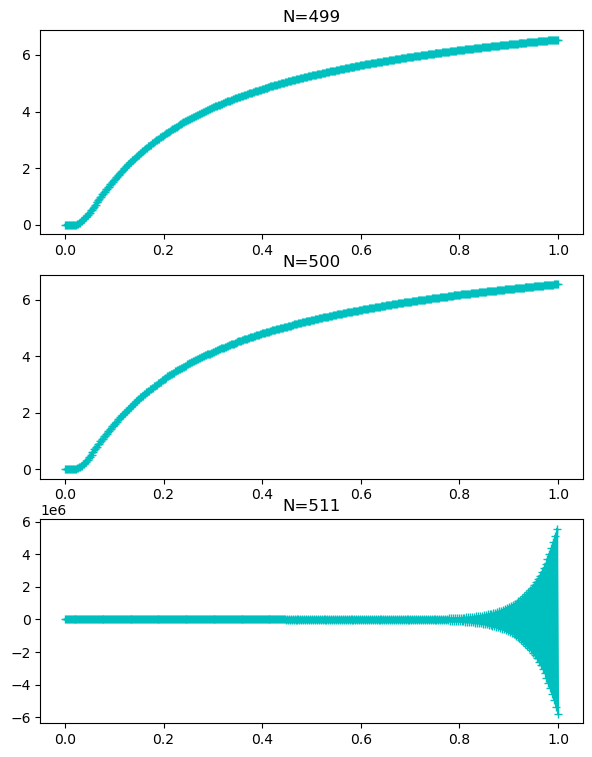

In [ ]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

t = 10

Ns = [499, 500, 511]
fig, ax = plt.subplots(len(Ns), 1, figsize=(7, len(Ns) * 3))
for i, N in enumerate(Ns):
    A, f = generate_tem_mat(N)
    u = spsolve(A, f).reshape((N + 1, N + 1))

    # print(u[i,:] for i in range(u.shape[0]))

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x / N, u[:, t], 'c+-')
    # ax[i].plot(x, u[t - 1:len(u):N + 1])
    ax[i].set_title('N=' + str(N))

plt.show()

* plot the temperature of the rod at *t=1, t=2* and *t=10* .

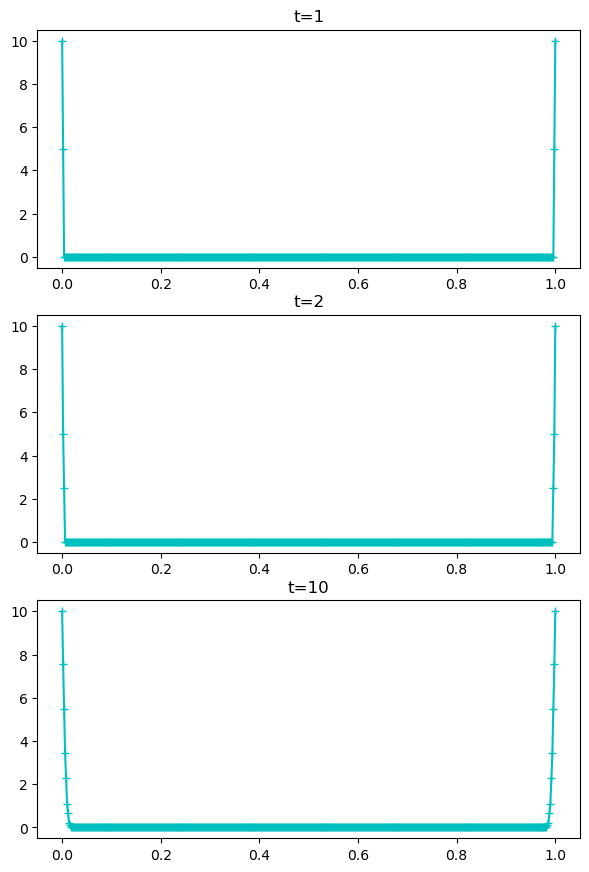

In [ ]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

Ts = [1, 2, 10]
N = 500

fig, ax = plt.subplots(len(Ts), 1, figsize=(7, len(Ts) * 3.5))
for i, t in enumerate(Ts):
    A, f = generate_tem_mat(N)
    u = spsolve(A, f).reshape((N + 1, N + 1))

    x = np.linspace(0, N, N + 1)
    ax[i].plot(x / N, u[t, :], 'c+-')
    # ax[i].plot(x, u[t - 1:len(u):N + 1])
    ax[i].set_title('t=' + str(t))

plt.show()

* Briefly (1-2 sentences) comment on how you picked a value for *N*.

* Use numba.cuda to parallelize your implementation on a GPU
    * think carefully about when data needs to be copied, and be careful not to copy data to/from the GPU when not needed.

In [3]:


import numba
import numpy as np
from numba import cuda
from scipy.sparse import coo_matrix


def generate_tem_mat_cuda(N):
    totalelements_f = (N + 1) ** 2
    totalelements = totalelements_f * 4
    param = 1000
    t_per_block = 16  # <=32

    block_per_grid = int(math.ceil((N + 1) / t_per_block))

    blocks = (block_per_grid, block_per_grid)
    threads = (t_per_block, t_per_block)

    @cuda.jit
    def kernel(N, rows, cols, data, f):
        positions = numba.cuda.local.array(2, dtype=numba.int64)
        ranks = numba.cuda.local.array(2, dtype=numba.int64)

        positions[0] = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
        positions[1] = cuda.blockIdx.y * cuda.blockDim.y + cuda.threadIdx.y

        if positions[0] >= (N + 1) or positions[1] >= (N + 1): return

        # cuda.syncthreads()

        ranks[0] = positions[1] * (N + 1) + positions[0]  # rank_in_grid
        ranks[1] = (positions[1] * (N + 1) + positions[0]) * 4  # rank_in_block*4

        if positions[0] == 0 or positions[0] == N or positions[1] == 0:
            for i in range(ranks[1], ranks[1] + 4):
                cols[i] = ranks[0]
                rows[i] = ranks[0]
                data[i] = 1. if i == ranks[1] else 0.
            f[ranks[0]] = 10 if (positions[0] == 0 or positions[0] == N) else 0

        else:
            for i in range(ranks[1], ranks[1] + 4):
                rows[i] = ranks[0]
                if i == ranks[1] + 3:
                    cols[i] = ranks[0]
                else:
                    cols[i] = ranks[0] - (N + 2) + (i - ranks[1])  #!!!

                if i == ranks[1] or i == (ranks[1] + 2):
                    data[i] = -N / param
                elif i == (ranks[1] + 1):
                    data[i] = -1 + N / (param / 2)
                else:
                    data[i] = 1.
            f[ranks[0]] = 0

        cuda.syncthreads()

    rows = cuda.device_array(shape=totalelements, dtype=np.int64)
    cols = cuda.device_array(shape=totalelements, dtype=np.int64)
    data = cuda.device_array(shape=totalelements, dtype=np.float64)
    f = cuda.device_array(shape=totalelements_f, dtype=np.float64)

    # print('blocks/grid: {0} ({2}*{2})\nthreads/block: {1} ({3}*{3})'.format(block_per_grid ** 2, t_per_block ** 2,
    #                                                                         block_per_grid, t_per_block))

    kernel[blocks, threads](N, rows, cols, data, f)

    cpu_rows = rows.copy_to_host()
    cpu_cols = cols.copy_to_host()
    cpu_data = data.copy_to_host()
    cpu_f = f.copy_to_host()

    A = coo_matrix((cpu_data, (cpu_rows, cpu_cols)),
                   shape=((N + 1) ** 2, (N + 1) ** 2)).tocsr()

    # print('matrix A, f generated')
    return A, cpu_f


In [ ]:
def cuda_init():
    cuda.detect()
    a = cuda.device_array(shape=(2, 2), dtype=np.float32)
    print('Initialization complete')

In [ ]:
# Check
def check_result(Ns):
    cuda_init()

    for N in Ns:
        A, f = generate_tem_mat_cuda(N)
        AA, ff = generate_tem_mat(N)
        assert np.allclose(A.toarray(), AA.toarray())
        assert np.allclose(f, ff)


check_result([104])

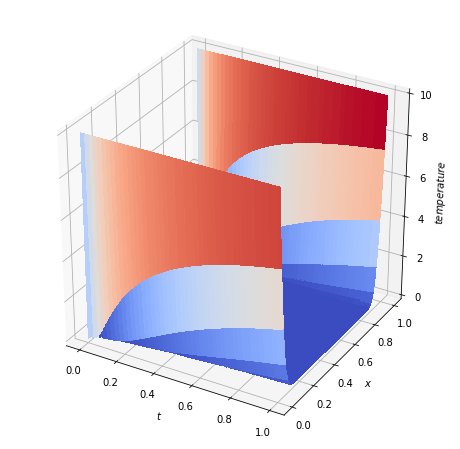

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
import math

from scipy.sparse.linalg import spsolve

N = 502
param = 1000

A, f = generate_tem_mat_cuda(N)
sol = spsolve(A, f).reshape((N + 1, N + 1)).T
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ticks = np.linspace(0, 1, N + 1)
X, Y = np.meshgrid(ticks, ticks)
surf = ax.plot_surface(X, Y, sol, antialiased=False, cmap=cm.coolwarm)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
ax.set_zlabel(r'$temperature$')

plt.show()

* Use your code to estimate the time at which the temperature of the midpoint of the rod first exceeds a temperature of 9.8.
* Briefly (2-3 sentences) describe how you estimated this time.

Minimum t that satisfies the given condition: 12.646258503401361


D:\ProgramData\Anaconda3\envs\new\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


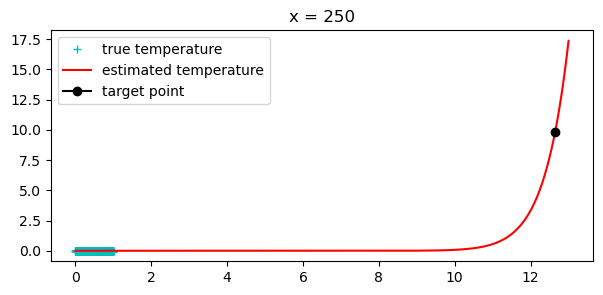

In [ ]:
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import math

target_temp = 9.8
N = 500
x = int(np.ceil(N / 2))
A, f = generate_tem_mat_cuda(N)
u = spsolve(A, f).reshape((N + 1, N + 1))
t = np.linspace(0, 1, N + 1)

f1 = np.polyfit(t, u[:, x], 20)
u_fit = np.polyval(f1, t)

t_more = np.linspace(0, 13, N * 5)
u_more = np.polyval(f1, t_more)

target_t_index = np.argwhere(u_more >= target_temp)[0]
target_t = t_more[target_t_index]
print('Minimum t that satisfies the given condition: {}'.format(float(target_t)))

fig, ax = plt.subplots(1, 1, figsize=(7, 3))

p1, = ax.plot(t, u[:, x], 'c+')
p2, = ax.plot(t_more, u_more, 'r-')
p3, = ax.plot(target_t, np.polyval(f1, target_t),  marker='o', color='black')
plt.legend([p1, p2, p3], ["true temperature", "estimated temperature",'target point'], loc='upper left')

ax.set_title('x = ' + str(x))

plt.show()